**Harris Corner Direction**:

Unlike edges, corners pixels have high difference in all direction

WSSD(weighted sum of square difference) but with small patch
* E = sum_for_all_pixels_i(w(i) * [I(xi + u, yi + v) - I(xi, yi)

Using Taylor Expansion: I(x + u, y + v) = I(x, y) + I’(x, y) * u + I’(x, y) * v

refer: https://en.wikipedia.org/wiki/Harris_Corner_Detector

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [16]:
!wget 'https://banner2.cleanpng.com/20180219/fzw/kisspng-chessboard-draughts-chess-piece-board-game-checkerboard-5a8a801f7832a9.1952904215190262074923.jpg' -o chess.jpg
i_img_path = 'kisspng-chessboard-draughts-chess-piece-board-game-checkerboard-5a8a801f7832a9.1952904215190262074923.jpg'

Text(0.5, 1.0, 'Harris Corners')

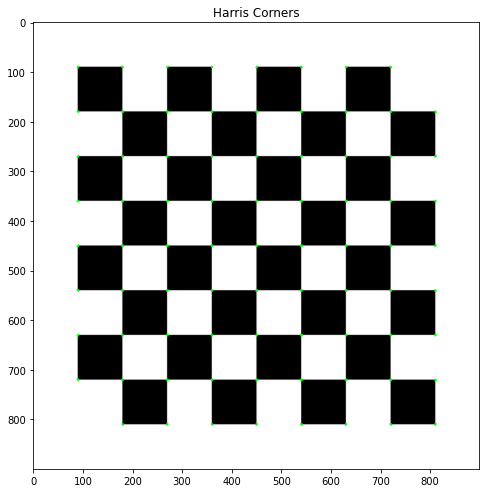

In [17]:
# Harris Detector OpenCV
img = cv2.imread(i_img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

h = cv2.cornerHarris(gray, 2, 3, 0.004)
h = cv2.dilate(h,None)

#apply threshold, may depend on the image
img[h > 0.01 * h.max()] = [0, 255, 0]

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(8, 12)
axs.imshow(img); axs.set_title('Harris Corners')

Above features (corners) are resistant to rotation, translation but scale

To resolve this we have **SIFT, SURF, FAST, BRIEF, ORB**

**SIFT: SCLAE INVARIANT FEATURE TRANSFORM**


Refer: https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

**ORB: An efficient alternative to SIFT or SURF**



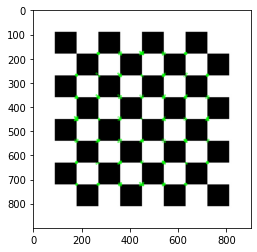

(<matplotlib.image.AxesImage at 0x7f06588a8dd8>, None)

In [18]:
img = cv2.imread(i_img_path,0)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)


# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [30]:
!wget 'https://s31242.pcdn.co/wp-content/uploads/2019/06/twitter-FamilyGuyonFOX-5-1024x903.jpg'
i_img_path = 'twitter-FamilyGuyonFOX-5-1024x903.jpg'

--2020-07-29 23:55:41--  https://s31242.pcdn.co/wp-content/uploads/2019/06/twitter-FamilyGuyonFOX-5-1024x903.jpg
Resolving s31242.pcdn.co (s31242.pcdn.co)... 143.204.202.23, 143.204.202.70, 143.204.202.66, ...
Connecting to s31242.pcdn.co (s31242.pcdn.co)|143.204.202.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from s31242.pcdn.co attempted to set domain to pinknews.co.uk
Length: 55579 (54K) [image/jpeg]
Saving to: ‘twitter-FamilyGuyonFOX-5-1024x903.jpg.1’

twitter-FamilyGuyon 100%[===================>]  54,28K  --.-KB/s    in 0,01s   

2020-07-29 23:55:41 (4,84 MB/s) - ‘twitter-FamilyGuyonFOX-5-1024x903.jpg.1’ saved [55579/55579]



Text(0.5, 1.0, 'Matched Features')

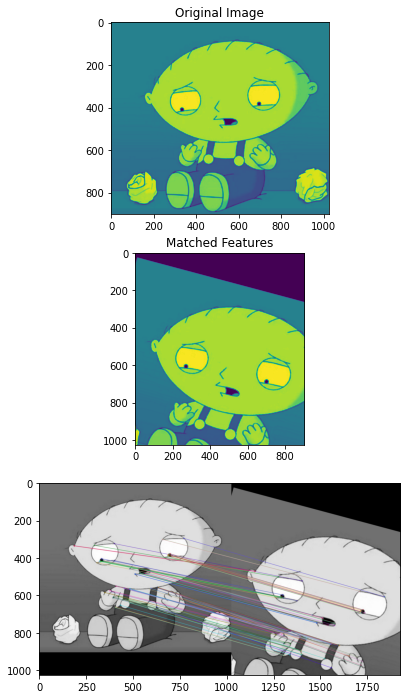

In [56]:
img = cv2.imread(i_img_path, cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

img_affine = cv2.warpAffine(img, 1.2 * np.array([[np.cos(np.pi/12), -np.sin(np.pi/12), 10], 
                                           [np.sin(np.pi/12), np.cos(np.pi/12), 20]]), dsize=(rows, cols))

orb = cv2.ORB_create() # initialize

kp_org, des_org = orb.detectAndCompute(img, None)
kp_affine, des_affine = orb.detectAndCompute(img_affine, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des_org, des_affine)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 100 matches.
img_feature_match = cv2.drawMatches(img, kp_org, img_affine, kp_affine, 
                                   matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(8, 12)
axs[0].imshow(img); axs[0].set_title('Original Image')
axs[1].imshow(img_affine); axs[1].set_title('Affine Transformed Image')
axs[2].imshow(img_feature_match); axs[1].set_title('Matched Features')